In [46]:
import cv2

I = cv2.imread("mandril.jpg")
cv2.imshow("Mandril",I) # display
cv2.waitKey(0) # wait for key
cv2.destroyAllWindows() 

In [47]:
cv2.imwrite("m.png",I)

True

In [48]:
print(I.shape) # dimensions /rows, columns, depth/
print(I.size) # number of bytes
print(I.dtype) # data type


(512, 512, 3)
786432
uint8


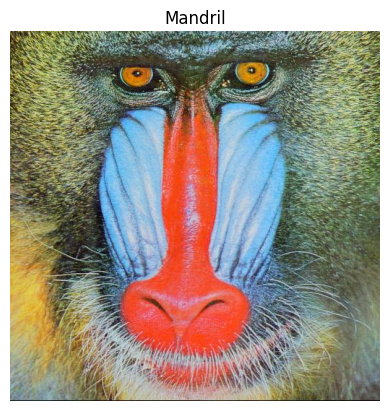

In [49]:
import matplotlib.pyplot as plt


I = plt.imread("mandril.jpg")

plt.figure(1) # create figure
plt.imshow(I) # add image
plt.title("Mandril") # add title
plt.axis("off") # disable display of the coordinate system
plt.show() 

plt.imsave("mandril.png",I)


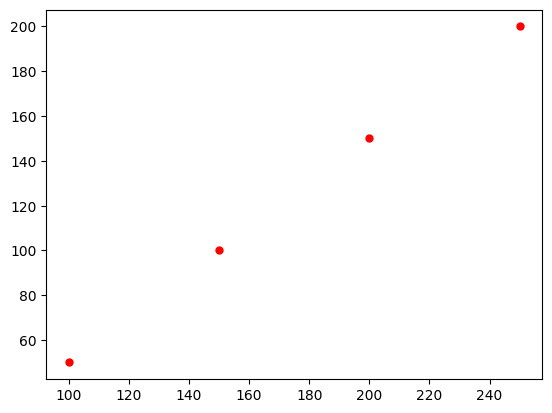

In [50]:
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.plot(x,y,"r.",markersize=10)

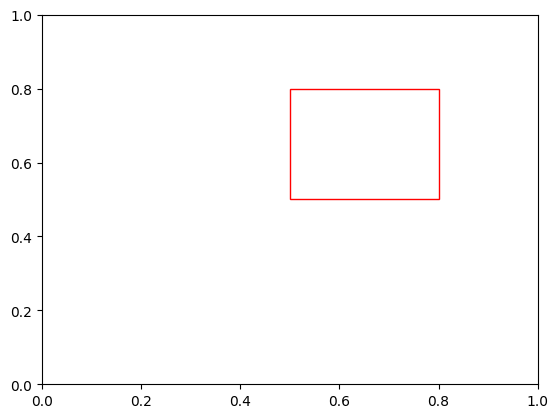

In [51]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1)
rect = Rectangle((0.5, 0.5), 0.3, 0.3, fill=False, edgecolor='r')  # Poprawiono składnię argumentu ec
ax.add_patch(rect)
plt.show()

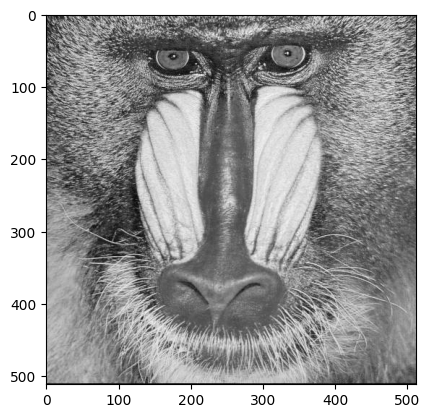

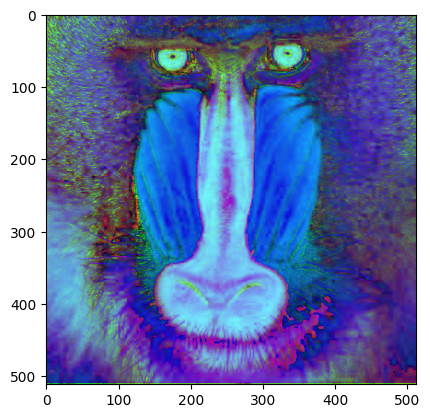

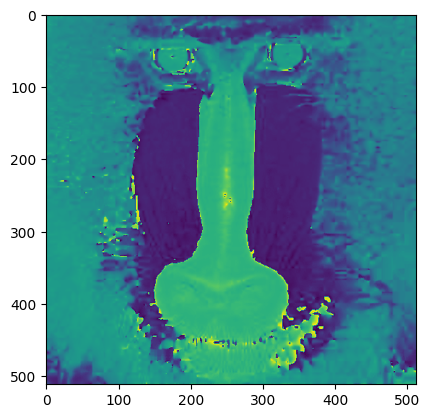

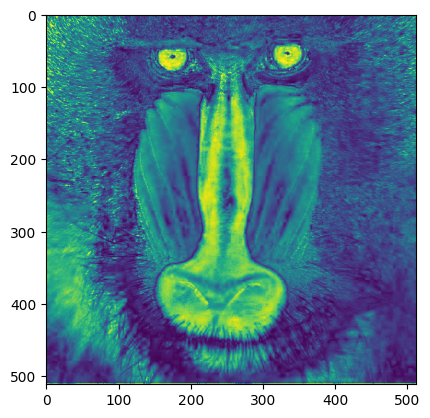

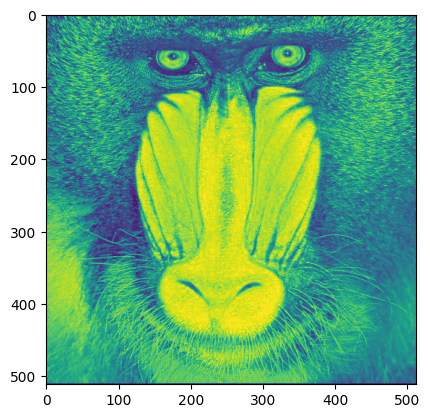

In [52]:
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

plt.imshow(IG,'gray')
plt.figure()
plt.imshow(IHSV)
plt.figure()
IH = IHSV[:,:,0]
IS = IHSV[:,:,1]
IV = IHSV[:,:,2]

plt.imshow(IH)
plt.figure()
plt.imshow(IS)
plt.figure()
plt.imshow(IV)

In [53]:
def rgb2gray(I):
    return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2]


import matplotlib # add at the top of the file
_HSV = matplotlib.colors.rgb_to_hsv(I)


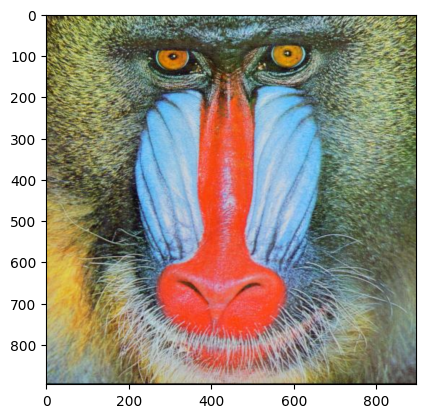

In [54]:
height, width =I.shape[:2] # retrieving elements 1 and 2, i.e. the corresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I,(int(scale*height),int(scale*width)))
plt.imshow(Ix2)

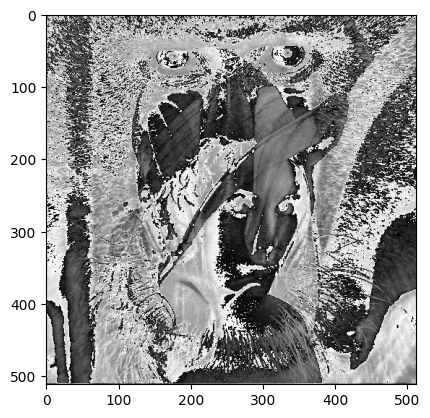

In [55]:
mandril = cv2.imread("mandril.jpg")
lena = cv2.imread("lena.png")

lena=cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
mandril=cv2.cvtColor(mandril, cv2.COLOR_BGR2GRAY)

added=lena+mandril
plt.figure()
plt.imshow(added,'gray')

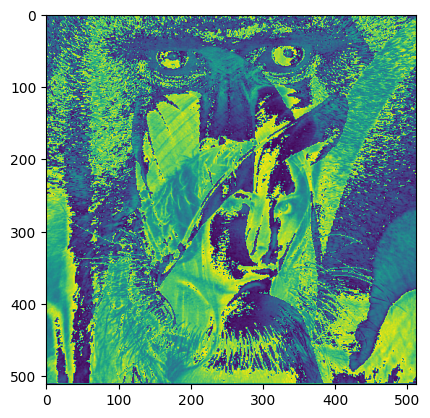

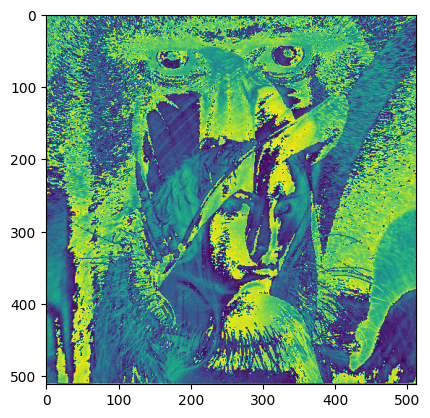

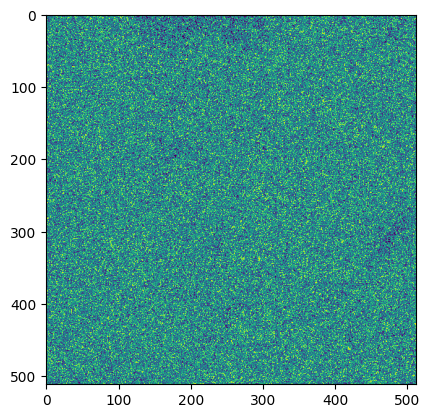

In [56]:
substracted1=lena-mandril
substarcted2=mandril-lena
multiplied=lena*mandril
plt.figure()
plt.imshow(substracted1)
plt.figure()
plt.imshow(substarcted2)
plt.figure()
plt.imshow(multiplied)

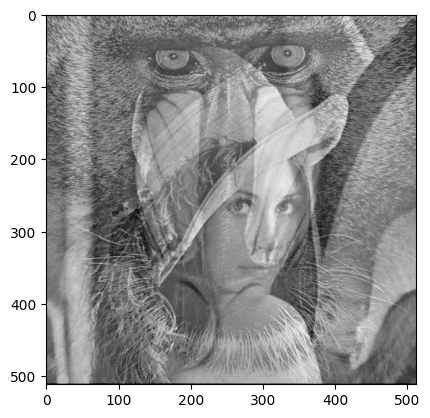

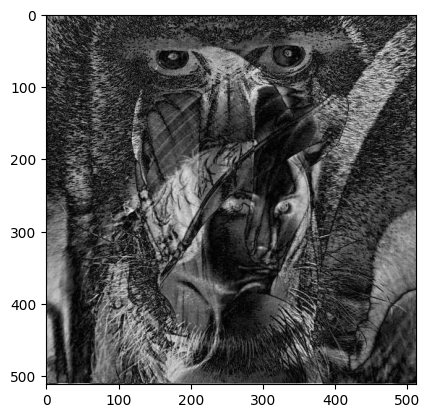

In [57]:
import numpy as np
alpha = 0.5
beta = 0.5
blended_image = cv2.addWeighted(mandril, alpha, lena, beta, 0)

# Obliczenie modułu z różnicy
diff = cv2.absdiff(mandril, lena).astype(np.uint8)

plt.figure()
plt.imshow(blended_image,'gray')
plt.figure()
plt.imshow(diff,'gray')



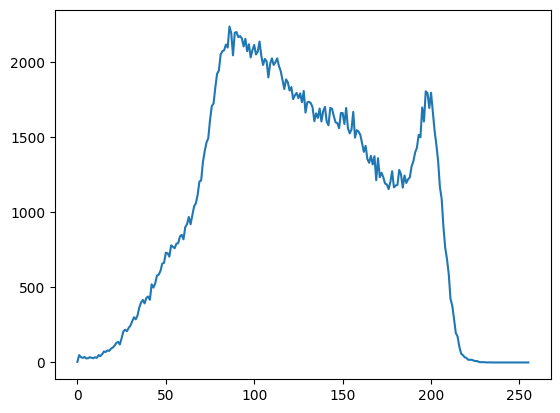

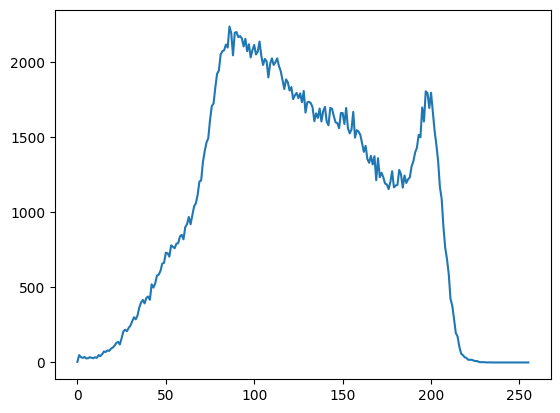

In [58]:
def histo(lena):
    h=np.zeros((256,1), np.float32) # creates and zeros single-column
    
    height, width =lena.shape[:2] # shape - we take the first 2 values
    for y in range(height):
        for x in range(width):
            h[lena[x][y]]+=1
    return h




hist = cv2.calcHist([IG],[0],None,[256],[0,256])
histo=histo(IG)
plt.figure()
plt.plot(hist)
plt.figure()
plt.plot(histo)

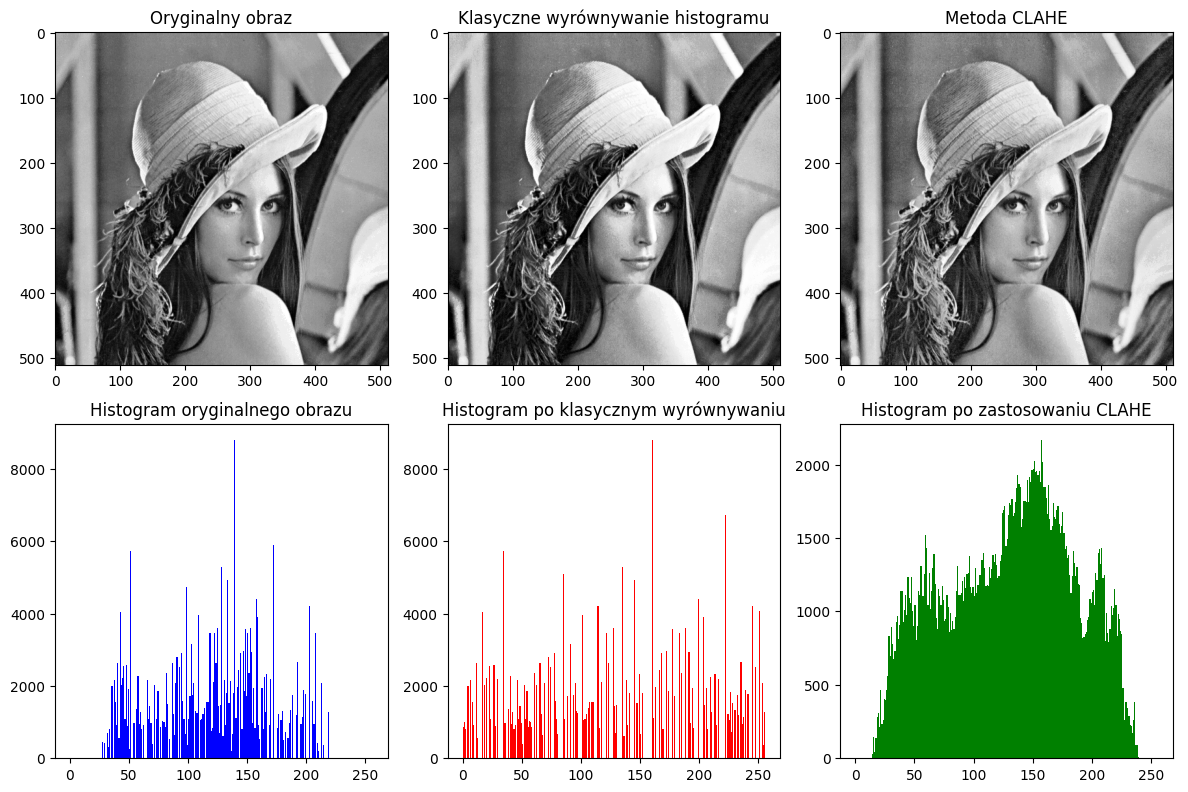

In [59]:
equ = cv2.equalizeHist(lena)
# Metoda CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_lena = clahe.apply(lena)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title('Oryginalny obraz')

plt.subplot(2, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title('Klasyczne wyrównywanie histogramu')

plt.subplot(2, 3, 3)
plt.imshow(clahe_lena, cmap='gray')
plt.title('Metoda CLAHE')

plt.subplot(2, 3, 4)
plt.hist(lena.flatten(), 256, [0, 256], color='b')
plt.title('Histogram oryginalnego obrazu')

plt.subplot(2, 3, 5)
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.title('Histogram po klasycznym wyrównywaniu')

plt.subplot(2, 3, 6)
plt.hist(clahe_lena.flatten(), 256, [0, 256], color='g')
plt.title('Histogram po zastosowaniu CLAHE')

plt.tight_layout()
plt.show()